In [2]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from keras.datasets import cifar10


Using TensorFlow backend.


In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Number of training and testing samples
len(x_train), len(x_test)

(50000, 10000)

Populating the interactive namespace from numpy and matplotlib
    [6]        [9]        [9]        [4]        [1]        [1]        [2]        [7]        [8]        [3]   


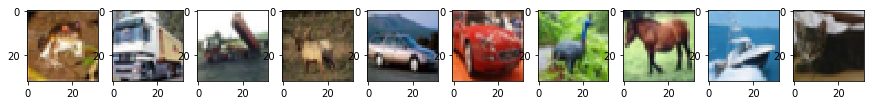

In [4]:
# x_train, y_train, x_test and y_test are just images (x) and their associated labels (y)
# Let's plot a few

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 5) # Increase fig size to make pyplot larger
# Plot first 10 images
from matplotlib import pyplot
fig, ax = pyplot.subplots(ncols=10) # Use subplots to plot them horizontally
for i in xrange(10):
    ax[i].imshow(x_train[i], cmap=pyplot.cm.binary)
    print "   ",y_train[i], "  ",

In [12]:
# The images are 32x32, and each pixel has 3 RGB values, images are stored in 2D format: rows x cols
# So the address pixel in location i,j for image k, you have to do: x_train[k][i][j]
# First pixel, first image:
x_train[0][0][0] # -> RGB values

array([59, 62, 63], dtype=uint8)

In [25]:
import keras
one_hot_output = keras.utils.to_categorical(y_train)
y_train[0], 

(array([6], dtype=uint8),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]))

In [39]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D

number_of_labels = len(one_hot_output[0])

model = Sequential()

# input_shape = (nr_rows, nr_cols, nr_channels (RGB=3))
model.add(Conv2D(filters=3, kernel_size=(2, 2), strides=(2, 2), input_shape=(32, 32, 3)))
model.add(Conv2D(filters=3, kernel_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=3, kernel_size=(2, 2), strides=(2, 2)))

model.add(Dense(number_of_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 16, 16, 3)         39        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 3)           39        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 3)           39        
_________________________________________________________________
dense_13 (Dense)             (None, 4, 4, 10)          40        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
